In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


load the dataset from source file

In [151]:
data=pd.read_csv('Amoxyclav_Sales_Data_India_1000_Rows.csv')
data

,Transaction ID,Date,Product ID,Product Name,Quantity Sold,Unit Price,Total Sales Value,Region,Sales Representative
0,TX00001,2024-01-23,AC001,Amoxyclav 625mg Tablet,81,12.5,1012.5,North,Vikas Gupta
1,TX00002,2023-04-01,AC001,Amoxyclav 625mg Tablet,451,12.5,5637.5,South,Sunita Das
2,TX00003,2024-02-16,AC001,Amoxyclav 625mg Tablet,236,12.5,2950.0,Central,Rahul Sharma
3,TX00004,2024-01-19,AC001,Amoxyclav 625mg Tablet,108,12.5,1350.0,North,Sunita Das
4,TX00005,2023-03-25,AC002,Amoxyclav 1g Tablet,477,18.0,8586.0,West,Priya Iyer
...,...,...,...,...,...,...,...,...,...
995,TX00996,2023-07-24,AC004,Amoxyclav 375mg Tablet,425,8.5,3612.5,North,Anita Roy
996,TX00997,2023-05-19,AC004,Amoxyclav 375mg Tablet,273,8.5,2320.5,South,Karan Patel
997,TX00998,2023-03-29,AC004,Amoxyclav 375mg Tablet,396,8.5,3366.0,West,Sunita Das
998,TX00999,2023-06-25,AC002,Amoxyclav 1g Tablet,75,18.0,1350.0,East,Anita Roy


check the duplicate row

In [152]:
new=data.loc[data.duplicated]
new

,Transaction ID,Date,Product ID,Product Name,Quantity Sold,Unit Price,Total Sales Value,Region,Sales Representative


check the data type of data

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction ID        1000 non-null   object 
 1   Date                  1000 non-null   object 
 2   Product ID            1000 non-null   object 
 3   Product Name          1000 non-null   object 
 4   Quantity Sold         1000 non-null   int64  
 5   Unit Price            1000 non-null   float64
 6   Total Sales Value     1000 non-null   float64
 7   Region                1000 non-null   object 
 8   Sales Representative  1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


convert the datatype of date from object to datetime

In [154]:
data['Date']=pd.to_datetime(data['Date'])


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction ID        1000 non-null   object        
 1   Date                  1000 non-null   datetime64[ns]
 2   Product ID            1000 non-null   object        
 3   Product Name          1000 non-null   object        
 4   Quantity Sold         1000 non-null   int64         
 5   Unit Price            1000 non-null   float64       
 6   Total Sales Value     1000 non-null   float64       
 7   Region                1000 non-null   object        
 8   Sales Representative  1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 70.4+ KB


check the revenue of each sales representtative

In [156]:
mr=data.groupby('Sales Representative').agg(mr_revenue=('Total Sales Value','sum')

).sort_values('mr_revenue',ascending=False)
mr

,mr_revenue
Sales Representative,
Arjun Mehta,380724.0
Sunita Das,364541.0
Deepa Nair,363370.5
Karan Patel,358680.5
Vikas Gupta,358440.5
Rahul Sharma,340760.5
Priya Iyer,336290.5
Anita Roy,306459.5


generate revenue of region wise

In [157]:
region=data.groupby( 'Region').agg(reg_revenue=('Total Sales Value','sum')

).sort_values('reg_revenue',ascending=False)
region

,reg_revenue
Region,
East,600035.0
North,586671.0
South,575510.0
Central,548476.5
West,498574.5


check the generate revenue of each representative of each region

In [158]:
mr_region=data.groupby(['Region','Sales Representative']).agg(mr_region_rev=('Total Sales Value','sum')

).sort_values(['Region','mr_region_rev'],ascending=[True,False]).reset_index()
mr_region

,Region,Sales Representative,mr_region_rev
0,Central,Deepa Nair,96763.0
1,Central,Rahul Sharma,79993.0
2,Central,Sunita Das,75281.0
3,Central,Karan Patel,67457.0
4,Central,Priya Iyer,66962.0
5,Central,Arjun Mehta,62580.0
6,Central,Anita Roy,54512.5
7,Central,Vikas Gupta,44928.0
8,East,Sunita Das,96194.0
9,East,Deepa Nair,85615.0


In [159]:
top_sales_reps = mr_region.groupby('Region').head(1).reset_index(drop=True)
top_sales_reps

,Region,Sales Representative,mr_region_rev
0,Central,Deepa Nair,96763.0
1,East,Sunita Das,96194.0
2,North,Arjun Mehta,80765.5
3,South,Arjun Mehta,103419.0
4,West,Vikas Gupta,83745.5


check the quantity of sales of each representative

In [160]:
mr_qty=data.groupby('Sales Representative').agg(total_qty=(  'Quantity Sold','sum')

).sort_values('total_qty',ascending=False).reset_index()
mr_qty

,Sales Representative,total_qty
0,Priya Iyer,32266
1,Sunita Das,32002
2,Arjun Mehta,31443
3,Deepa Nair,31027
4,Vikas Gupta,30968
5,Rahul Sharma,30569
6,Karan Patel,30334
7,Anita Roy,28179


product wise total quantity

In [161]:
prod_qty=data.groupby('Product Name').agg(total_prod_qty=('Quantity Sold','sum')).sort_values('total_prod_qty',ascending=False)
prod_qty



,total_prod_qty
Product Name,
Amoxyclav 375mg Tablet,66043
Amoxyclav 625mg Tablet,65549
Amoxyclav 1g Tablet,59110
Amoxyclav Dry Syrup,56086


check the total quantity of product wise of each sales representative

In [162]:
mr_prod_qty=data.groupby(['Sales Representative','Product Name']).agg(total_mr_qty=('Quantity Sold','sum')

).sort_values(['Sales Representative','total_mr_qty'],ascending=[True,False]).reset_index()
mr_prod_qty

,Sales Representative,Product Name,total_mr_qty
0,Anita Roy,Amoxyclav 375mg Tablet,8442
1,Anita Roy,Amoxyclav 625mg Tablet,7094
2,Anita Roy,Amoxyclav Dry Syrup,7091
3,Anita Roy,Amoxyclav 1g Tablet,5552
4,Arjun Mehta,Amoxyclav 625mg Tablet,10246
5,Arjun Mehta,Amoxyclav 1g Tablet,8763
6,Arjun Mehta,Amoxyclav 375mg Tablet,7047
7,Arjun Mehta,Amoxyclav Dry Syrup,5387
8,Deepa Nair,Amoxyclav 625mg Tablet,9359
9,Deepa Nair,Amoxyclav 375mg Tablet,8231


In [163]:
top_mr_prod_qty=mr_prod_qty.groupby('Sales Representative').head(1)
top_mr_prod_qty

,Sales Representative,Product Name,total_mr_qty
0,Anita Roy,Amoxyclav 375mg Tablet,8442
4,Arjun Mehta,Amoxyclav 625mg Tablet,10246
8,Deepa Nair,Amoxyclav 625mg Tablet,9359
12,Karan Patel,Amoxyclav 1g Tablet,8413
16,Priya Iyer,Amoxyclav Dry Syrup,11463
20,Rahul Sharma,Amoxyclav 625mg Tablet,8779
24,Sunita Das,Amoxyclav 375mg Tablet,10827
28,Vikas Gupta,Amoxyclav 1g Tablet,8451


creat new column of month from date column

In [164]:
data['month']=data['Date'].dt.month_name()
data

,Transaction ID,Date,Product ID,Product Name,Quantity Sold,Unit Price,Total Sales Value,Region,Sales Representative,month
0,TX00001,2024-01-23,AC001,Amoxyclav 625mg Tablet,81,12.5,1012.5,North,Vikas Gupta,January
1,TX00002,2023-04-01,AC001,Amoxyclav 625mg Tablet,451,12.5,5637.5,South,Sunita Das,April
2,TX00003,2024-02-16,AC001,Amoxyclav 625mg Tablet,236,12.5,2950.0,Central,Rahul Sharma,February
3,TX00004,2024-01-19,AC001,Amoxyclav 625mg Tablet,108,12.5,1350.0,North,Sunita Das,January
4,TX00005,2023-03-25,AC002,Amoxyclav 1g Tablet,477,18.0,8586.0,West,Priya Iyer,March
...,...,...,...,...,...,...,...,...,...,...
995,TX00996,2023-07-24,AC004,Amoxyclav 375mg Tablet,425,8.5,3612.5,North,Anita Roy,July
996,TX00997,2023-05-19,AC004,Amoxyclav 375mg Tablet,273,8.5,2320.5,South,Karan Patel,May
997,TX00998,2023-03-29,AC004,Amoxyclav 375mg Tablet,396,8.5,3366.0,West,Sunita Das,March
998,TX00999,2023-06-25,AC002,Amoxyclav 1g Tablet,75,18.0,1350.0,East,Anita Roy,June


month wise revenue

In [165]:
mon_rev=data.groupby('month').agg(total_mon_rev=('Total Sales Value','sum')

).sort_values('total_mon_rev',ascending=False)
mon_rev

,total_mon_rev
month,
March,387124.5
January,283208.5
February,258801.0
September,232550.0
May,227532.5
June,219904.5
December,217825.0
October,213929.5
November,204702.5


top most product sale of each month

In [166]:
mon_prod_qty=mon_rev=data.groupby(['month','Product Name']).agg(total_mon_qty=('Total Sales Value','sum')

).sort_values(['month','total_mon_qty'],ascending=[True,False]).reset_index()
mon_prod_qty

,month,Product Name,total_mon_qty
0,April,Amoxyclav 1g Tablet,79326.0
1,April,Amoxyclav 625mg Tablet,45112.5
2,April,Amoxyclav 375mg Tablet,41174.0
3,April,Amoxyclav Dry Syrup,28184.0
4,August,Amoxyclav 625mg Tablet,54162.5
5,August,Amoxyclav 1g Tablet,43614.0
6,August,Amoxyclav Dry Syrup,36062.0
7,August,Amoxyclav 375mg Tablet,35028.5
8,December,Amoxyclav 1g Tablet,90918.0
9,December,Amoxyclav 625mg Tablet,71975.0


In [167]:
top_mon_prod_qty=mon_prod_qty.groupby('month').head(1)
top_mon_prod_qty

,month,Product Name,total_mon_qty
0,April,Amoxyclav 1g Tablet,79326.0
4,August,Amoxyclav 625mg Tablet,54162.5
8,December,Amoxyclav 1g Tablet,90918.0
12,February,Amoxyclav 1g Tablet,102636.0
16,January,Amoxyclav 1g Tablet,114912.0
20,July,Amoxyclav 1g Tablet,79578.0
24,June,Amoxyclav 1g Tablet,80550.0
28,March,Amoxyclav 1g Tablet,173160.0
32,May,Amoxyclav 1g Tablet,91710.0
36,November,Amoxyclav 625mg Tablet,71750.0


In [168]:
df_625=data.loc[data['Product Name']=='Amoxyclav 625mg Tablet']
df_625

,Transaction ID,Date,Product ID,Product Name,Quantity Sold,Unit Price,Total Sales Value,Region,Sales Representative,month
0,TX00001,2024-01-23,AC001,Amoxyclav 625mg Tablet,81,12.5,1012.5,North,Vikas Gupta,January
1,TX00002,2023-04-01,AC001,Amoxyclav 625mg Tablet,451,12.5,5637.5,South,Sunita Das,April
2,TX00003,2024-02-16,AC001,Amoxyclav 625mg Tablet,236,12.5,2950.0,Central,Rahul Sharma,February
3,TX00004,2024-01-19,AC001,Amoxyclav 625mg Tablet,108,12.5,1350.0,North,Sunita Das,January
5,TX00006,2023-11-03,AC001,Amoxyclav 625mg Tablet,245,12.5,3062.5,Central,Vikas Gupta,November
...,...,...,...,...,...,...,...,...,...,...
978,TX00979,2024-02-27,AC001,Amoxyclav 625mg Tablet,232,12.5,2900.0,North,Karan Patel,February
979,TX00980,2023-12-01,AC001,Amoxyclav 625mg Tablet,243,12.5,3037.5,Central,Deepa Nair,December
981,TX00982,2023-03-30,AC001,Amoxyclav 625mg Tablet,459,12.5,5737.5,South,Arjun Mehta,March
982,TX00983,2023-12-20,AC001,Amoxyclav 625mg Tablet,240,12.5,3000.0,Central,Anita Roy,December


In [169]:
df_625_rep=df_625.groupby('Sales Representative').agg(total_625_unit=('Quantity Sold','sum')).sort_values('total_625_unit',ascending=False).reset_index()
df_625_rep

,Sales Representative,total_625_unit
0,Arjun Mehta,10246
1,Deepa Nair,9359
2,Rahul Sharma,8779
3,Karan Patel,8267
4,Sunita Das,8265
5,Vikas Gupta,7265
6,Anita Roy,7094
7,Priya Iyer,6274


top 3 representtative of 625

In [170]:
top_625=df_625_rep.head(3)
top_625

,Sales Representative,total_625_unit
0,Arjun Mehta,10246
1,Deepa Nair,9359
2,Rahul Sharma,8779


In [171]:
df_625_mon=df_625.groupby('month').agg(total_mon_625=('Quantity Sold','sum')).sort_values('total_mon_625',ascending=False).reset_index()
df_625_mon

,month,total_mon_625
0,February,7912
1,March,7183
2,January,6849
3,July,5804
4,September,5769
5,December,5758
6,November,5740
7,October,5113
8,August,4333
9,May,3845


In [172]:
top_df_625_mon=df_625_mon.head(3)
top_df_625_mon

,month,total_mon_625
0,February,7912
1,March,7183
2,January,6849


In [173]:
df_625_reg=df_625.groupby('Region').agg(total_625_reg=('Quantity Sold','sum')).sort_values('total_625_reg',ascending=False).reset_index()
df_625_reg

,Region,total_625_reg
0,East,14637
1,South,14266
2,North,14081
3,Central,12618
4,West,9947


In [174]:
df_375=data.loc[data['Product Name']=='Amoxyclav 375mg Tablet']
df_375

,Transaction ID,Date,Product ID,Product Name,Quantity Sold,Unit Price,Total Sales Value,Region,Sales Representative,month
9,TX00010,2023-07-19,AC004,Amoxyclav 375mg Tablet,474,8.5,4029.0,South,Deepa Nair,July
14,TX00015,2023-10-28,AC004,Amoxyclav 375mg Tablet,338,8.5,2873.0,East,Rahul Sharma,October
16,TX00017,2023-09-22,AC004,Amoxyclav 375mg Tablet,321,8.5,2728.5,Central,Karan Patel,September
17,TX00018,2023-04-12,AC004,Amoxyclav 375mg Tablet,102,8.5,867.0,North,Sunita Das,April
19,TX00020,2024-03-14,AC004,Amoxyclav 375mg Tablet,266,8.5,2261.0,South,Vikas Gupta,March
...,...,...,...,...,...,...,...,...,...,...
994,TX00995,2023-03-15,AC004,Amoxyclav 375mg Tablet,138,8.5,1173.0,Central,Karan Patel,March
995,TX00996,2023-07-24,AC004,Amoxyclav 375mg Tablet,425,8.5,3612.5,North,Anita Roy,July
996,TX00997,2023-05-19,AC004,Amoxyclav 375mg Tablet,273,8.5,2320.5,South,Karan Patel,May
997,TX00998,2023-03-29,AC004,Amoxyclav 375mg Tablet,396,8.5,3366.0,West,Sunita Das,March


In [175]:
df_375_mr=df_375.groupby('Sales Representative').agg(total_375=('Quantity Sold','sum')).sort_values('total_375',ascending=False).reset_index()
df_375_mr

,Sales Representative,total_375
0,Sunita Das,10827
1,Anita Roy,8442
2,Deepa Nair,8231
3,Priya Iyer,8228
4,Vikas Gupta,8186
5,Karan Patel,7579
6,Rahul Sharma,7503
7,Arjun Mehta,7047


In [176]:
df_top_375_mr=df_375_mr.head(3).reset_index()
df_top_375_mr

,index,Sales Representative,total_375
0,0,Sunita Das,10827
1,1,Anita Roy,8442
2,2,Deepa Nair,8231


In [177]:
df_375_mon=df_375.groupby('month').agg(total_mon_375=('Quantity Sold','sum')).sort_values('total_mon_375',ascending=False).reset_index()
df_375_mon

,month,total_mon_375
0,March,9198
1,June,7708
2,October,6928
3,May,6882
4,September,5945
5,January,5930
6,April,4844
7,August,4121
8,November,4117
9,July,4029


In [178]:
top_375_mon=df_375_mon.head(3)
top_375_mon

,month,total_mon_375
0,March,9198
1,June,7708
2,October,6928


In [179]:
df_375_region=df_375.groupby('Region').agg(total_375_region=('Quantity Sold','sum')).sort_values('total_375_region',ascending=False).reset_index()
df_375_region

,Region,total_375_region
0,West,14548
1,East,14303
2,North,14081
3,Central,13446
4,South,9665


In [180]:
data_dry=data.loc[data['Product Name']=='Amoxyclav Dry Syrup']
data_dry

,Transaction ID,Date,Product ID,Product Name,Quantity Sold,Unit Price,Total Sales Value,Region,Sales Representative,month
6,TX00007,2023-07-20,AC003,Amoxyclav Dry Syrup,29,6.5,188.5,Central,Rahul Sharma,July
7,TX00008,2023-08-10,AC003,Amoxyclav Dry Syrup,361,6.5,2346.5,North,Priya Iyer,August
10,TX00011,2024-02-11,AC003,Amoxyclav Dry Syrup,479,6.5,3113.5,South,Rahul Sharma,February
18,TX00019,2023-12-05,AC003,Amoxyclav Dry Syrup,39,6.5,253.5,North,Rahul Sharma,December
21,TX00022,2024-01-29,AC003,Amoxyclav Dry Syrup,293,6.5,1904.5,North,Rahul Sharma,January
...,...,...,...,...,...,...,...,...,...,...
959,TX00960,2023-08-28,AC003,Amoxyclav Dry Syrup,71,6.5,461.5,East,Vikas Gupta,August
973,TX00974,2023-06-16,AC003,Amoxyclav Dry Syrup,491,6.5,3191.5,South,Karan Patel,June
986,TX00987,2023-11-25,AC003,Amoxyclav Dry Syrup,60,6.5,390.0,Central,Priya Iyer,November
987,TX00988,2023-08-23,AC003,Amoxyclav Dry Syrup,102,6.5,663.0,South,Karan Patel,August


In [181]:
data_dry_mr=data_dry.groupby('Sales Representative').agg(total_dry=('Quantity Sold','sum')).sort_values('total_dry',ascending=False).reset_index()
data_dry_mr


,Sales Representative,total_dry
0,Priya Iyer,11463
1,Rahul Sharma,7819
2,Anita Roy,7091
3,Vikas Gupta,7066
4,Karan Patel,6075
5,Deepa Nair,5691
6,Sunita Das,5494
7,Arjun Mehta,5387


In [182]:
data_top_dry_mr=data_dry_mr.head(3).reset_index()
data_top_dry_mr

,index,Sales Representative,total_dry
0,0,Priya Iyer,11463
1,1,Rahul Sharma,7819
2,2,Anita Roy,7091


In [183]:
data_dry_mon=data_dry.groupby('month').agg(total_mon_dry=('Quantity Sold','sum')).sort_values('total_mon_dry',ascending=False).reset_index()
data_dry_mon


,month,total_mon_dry
0,March,7076
1,September,6510
2,August,5548
3,January,4966
4,February,4934
5,November,4924
6,May,4502
7,June,4371
8,April,4336
9,December,4035


In [184]:
data_top_dry_mon=data_dry_mon.head(3)
data_top_dry_mon

,month,total_mon_dry
0,March,7076
1,September,6510
2,August,5548


In [185]:
data_dry_region=data_dry.groupby('Region').agg(total_dry_month=('Quantity Sold','sum')).sort_values('total_dry_month',ascending=False).reset_index()
data_dry_region


,Region,total_dry_month
0,North,14868
1,West,11894
2,South,11309
3,Central,9105
4,East,8910


In [186]:
df_1g=data.loc[data['Product Name']=='Amoxyclav 1g Tablet']
df_1g

,Transaction ID,Date,Product ID,Product Name,Quantity Sold,Unit Price,Total Sales Value,Region,Sales Representative,month
4,TX00005,2023-03-25,AC002,Amoxyclav 1g Tablet,477,18.0,8586.0,West,Priya Iyer,March
8,TX00009,2024-02-11,AC002,Amoxyclav 1g Tablet,71,18.0,1278.0,East,Sunita Das,February
12,TX00013,2023-12-03,AC002,Amoxyclav 1g Tablet,42,18.0,756.0,North,Arjun Mehta,December
13,TX00014,2024-01-06,AC002,Amoxyclav 1g Tablet,16,18.0,288.0,North,Arjun Mehta,January
30,TX00031,2024-02-05,AC002,Amoxyclav 1g Tablet,388,18.0,6984.0,East,Rahul Sharma,February
...,...,...,...,...,...,...,...,...,...,...
983,TX00984,2023-09-11,AC002,Amoxyclav 1g Tablet,220,18.0,3960.0,South,Arjun Mehta,September
985,TX00986,2024-03-24,AC002,Amoxyclav 1g Tablet,45,18.0,810.0,South,Sunita Das,March
989,TX00990,2024-02-19,AC002,Amoxyclav 1g Tablet,46,18.0,828.0,East,Vikas Gupta,February
992,TX00993,2024-01-06,AC002,Amoxyclav 1g Tablet,496,18.0,8928.0,Central,Arjun Mehta,January


In [187]:
data_1g=df_1g.groupby('Sales Representative').agg(total_1g=('Quantity Sold','sum')).sort_values('total_1g',ascending=False).reset_index()
data_1g

,Sales Representative,total_1g
0,Arjun Mehta,8763
1,Vikas Gupta,8451
2,Karan Patel,8413
3,Deepa Nair,7746
4,Sunita Das,7416
5,Rahul Sharma,6468
6,Priya Iyer,6301
7,Anita Roy,5552


In [188]:
data_top_1g=data_1g.head(3).reset_index()
data_top_1g

,index,Sales Representative,total_1g
0,0,Arjun Mehta,8763
1,1,Vikas Gupta,8451
2,2,Karan Patel,8413


In [189]:
data_1g_mon=df_1g.groupby('month').agg(total_1g_mon=('Quantity Sold','sum')).sort_values('total_1g_mon',ascending=False).reset_index()
data_1g_mon

,month,total_1g_mon
0,March,9620
1,January,6384
2,February,5702
3,May,5095
4,December,5051
5,June,4475
6,July,4421
7,April,4407
8,October,4113
9,September,3755


In [190]:
data_top_1g_mon=data_1g_mon.head(3)
data_top_1g_mon

,month,total_1g_mon
0,March,9620
1,January,6384
2,February,5702


In [191]:
data_1g_region=df_1g.groupby('Region').agg(total_1g_region=('Quantity Sold','sum')).sort_values('total_1g_region',ascending=False).reset_index()
data_1g_region

,Region,total_1g_region
0,South,13418
1,East,13199
2,Central,12071
3,North,10796
4,West,9626


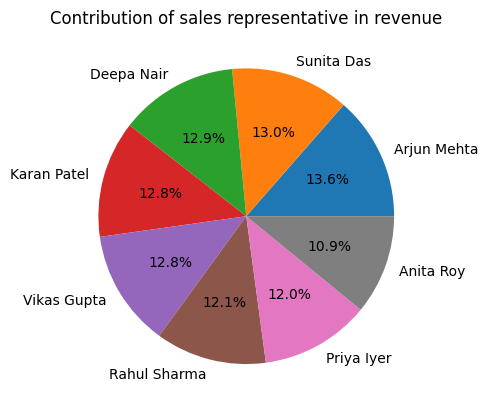

In [192]:
plt.pie(mr['mr_revenue'],labels=mr.index,autopct='%.1f%%')
plt.title('Contribution of sales representative in revenue')
plt.show()

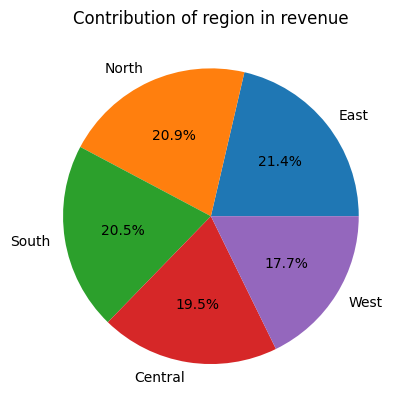

In [193]:
plt.pie(region['reg_revenue'],labels=region.index,autopct='%.1f%%')
plt.title('Contribution of region in revenue')
plt.show()

In [194]:
mr_qty=data.groupby('Sales Representative').agg(total_qty=(  'Quantity Sold','sum')

).sort_values('total_qty',ascending=False).reset_index()
mr_qty

,Sales Representative,total_qty
0,Priya Iyer,32266
1,Sunita Das,32002
2,Arjun Mehta,31443
3,Deepa Nair,31027
4,Vikas Gupta,30968
5,Rahul Sharma,30569
6,Karan Patel,30334
7,Anita Roy,28179


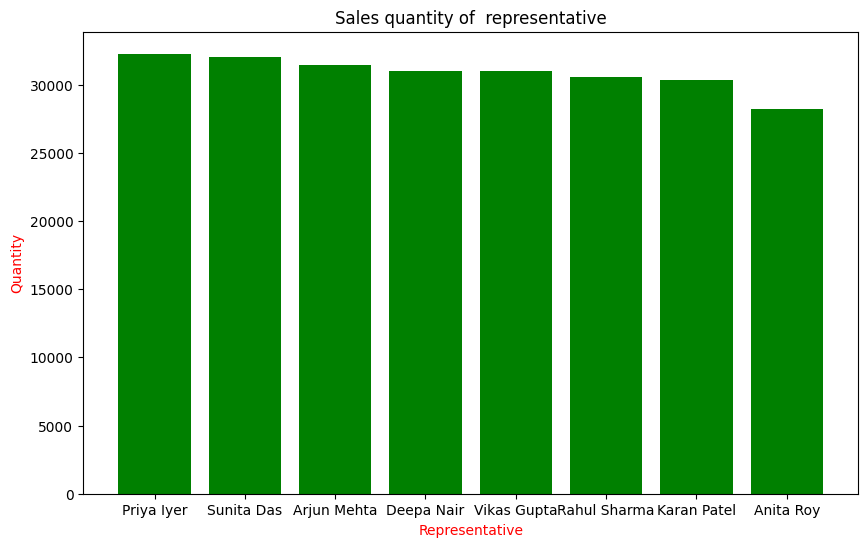

In [195]:
plt.figure(figsize=(10,6))
plt.bar(mr_qty['Sales Representative'],mr_qty['total_qty'],color='green')
plt.title('Sales quantity of  representative')
plt.ylabel('Quantity',color="red")
plt.xlabel('Representative',color='red')
plt.show()

In [196]:
top_sales_reps = mr_region.groupby('Region').head(1).reset_index()
top_sales_reps

,index,Region,Sales Representative,mr_region_rev
0,0,Central,Deepa Nair,96763.0
1,8,East,Sunita Das,96194.0
2,16,North,Arjun Mehta,80765.5
3,24,South,Arjun Mehta,103419.0
4,32,West,Vikas Gupta,83745.5


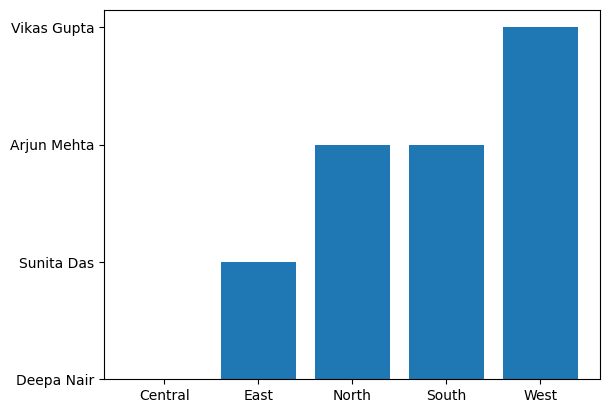

In [197]:
plt.bar(top_sales_reps['Region'],top_sales_reps['Sales Representative'])
plt.show()

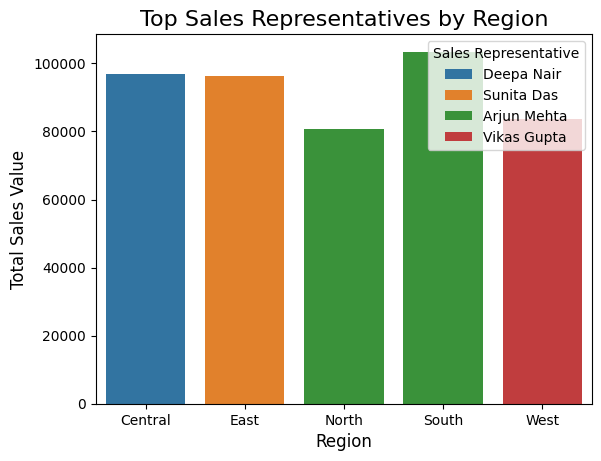

In [198]:
sns.barplot(
    data=top_sales_reps, 
    x='Region', 
    y='mr_region_rev', 
    hue='Sales Representative')
plt.title('Top Sales Representatives by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_14808\2336646629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mr_qty,x='Sales Representative',y='total_qty',palette='coolwarm')


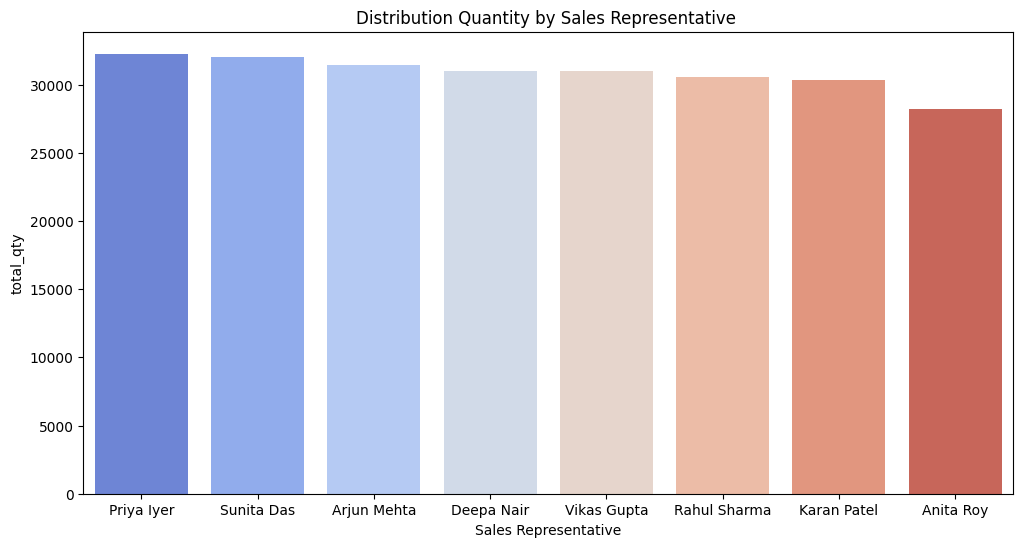

In [199]:
plt.figure(figsize=(12,6))
sns.barplot(data=mr_qty,x='Sales Representative',y='total_qty',palette='coolwarm')
plt.title('Distribution Quantity by Sales Representative ')
plt.show()

In [200]:
prod_qty=data.groupby('Product Name').agg(total_prod_qty=('Quantity Sold','sum')).sort_values('total_prod_qty',ascending=False).reset_index()
prod_qty



,Product Name,total_prod_qty
0,Amoxyclav 375mg Tablet,66043
1,Amoxyclav 625mg Tablet,65549
2,Amoxyclav 1g Tablet,59110
3,Amoxyclav Dry Syrup,56086


<function matplotlib.pyplot.show(close=None, block=None)>

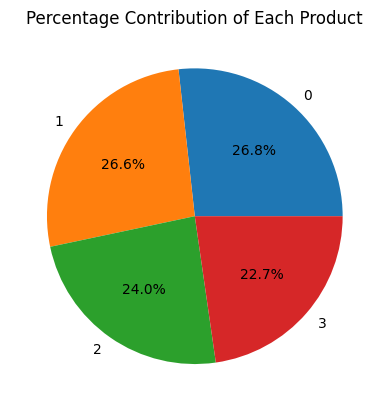

In [201]:
plt.pie(prod_qty['total_prod_qty'],labels=prod_qty.index,autopct='%.1f%%')
plt.title('Percentage Contribution of Each Product')
plt.show

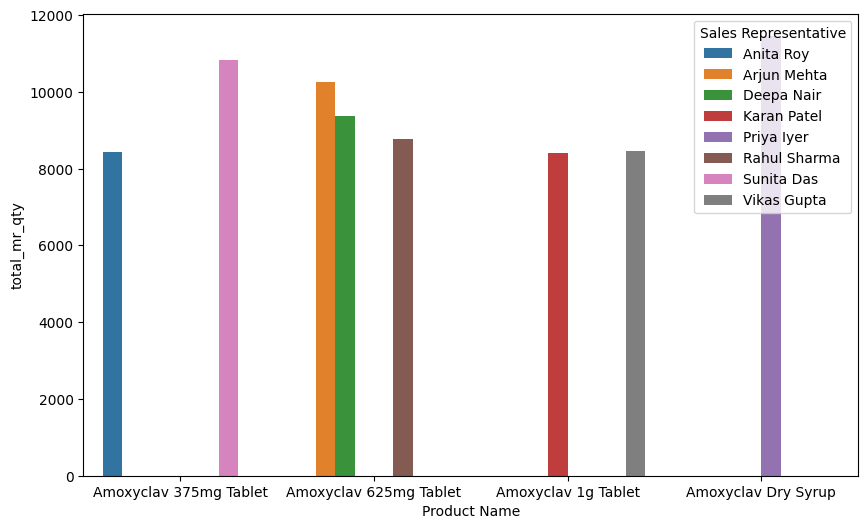

In [202]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Name',y='total_mr_qty',hue='Sales Representative',data=top_mr_prod_qty)
plt.show()

In [203]:
top_mon_prod_qty=mon_prod_qty.groupby('month').head(1)
top_mon_prod_qty

,month,Product Name,total_mon_qty
0,April,Amoxyclav 1g Tablet,79326.0
4,August,Amoxyclav 625mg Tablet,54162.5
8,December,Amoxyclav 1g Tablet,90918.0
12,February,Amoxyclav 1g Tablet,102636.0
16,January,Amoxyclav 1g Tablet,114912.0
20,July,Amoxyclav 1g Tablet,79578.0
24,June,Amoxyclav 1g Tablet,80550.0
28,March,Amoxyclav 1g Tablet,173160.0
32,May,Amoxyclav 1g Tablet,91710.0
36,November,Amoxyclav 625mg Tablet,71750.0


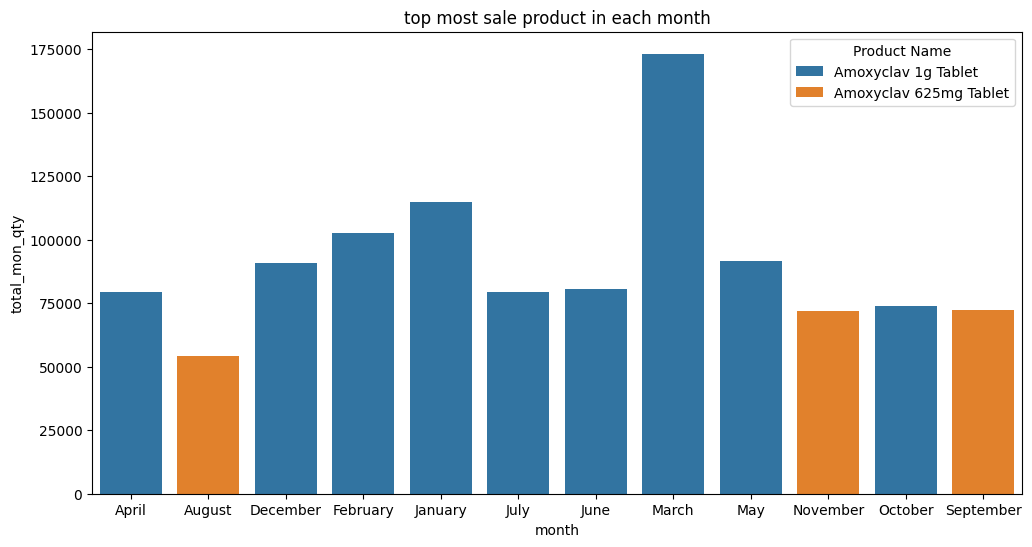

In [204]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_mon_prod_qty,x='month',y='total_mon_qty',hue='Product Name')
plt.title('top most sale product in each month')
plt.show()

In [205]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='total_mon_rev',markers="o",data=mon_rev)
plt.title('Revenue By Month')
plt.show()

ValueError: Could not interpret value `total_mon_rev` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [121]:
top_625=df_625_rep.head(3)
top_625

,Sales Representative,total_625_unit
0,Arjun Mehta,10246
1,Deepa Nair,9359
2,Rahul Sharma,8779


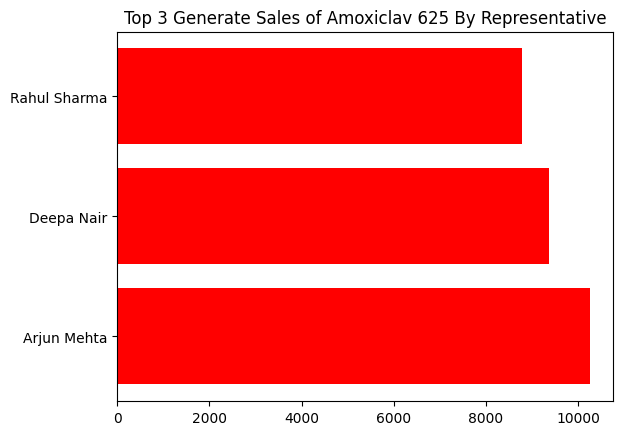

In [132]:
plt.barh(top_625['Sales Representative'],top_625['total_625_unit'],color="red")
plt.title('Top 3 Generate Sales of Amoxiclav 625 By Representative')
plt.show()

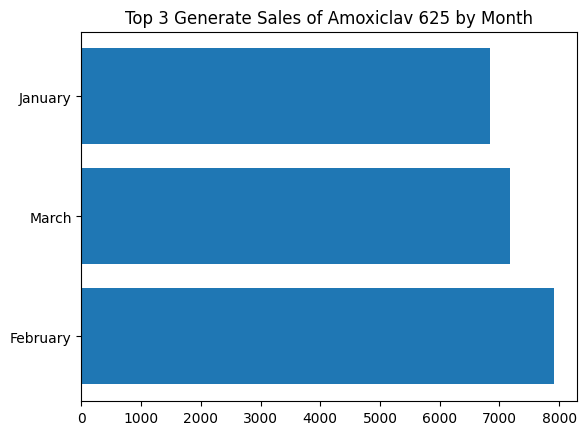

In [ ]:
plt.barh(top_df_625_mon['month'],top_df_625_mon['total_mon_625'])
plt.title('Top 3 Generate Sales of Amoxiclav 625 by Month')
plt.show()

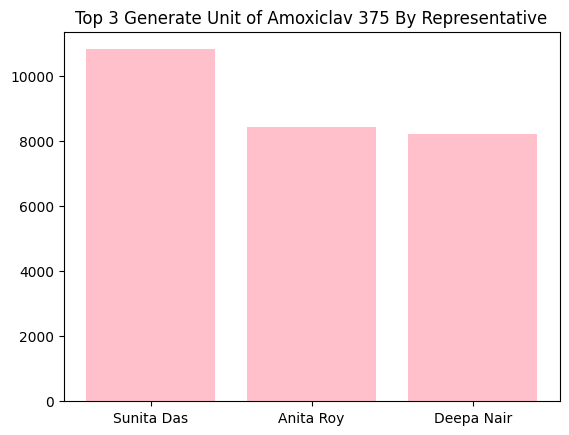

In [131]:
plt.bar(df_top_375_mr['Sales Representative'],df_top_375_mr['total_375'],color="pink")
plt.title('Top 3 Generate Unit of Amoxiclav 375 By Representative')
plt.show()

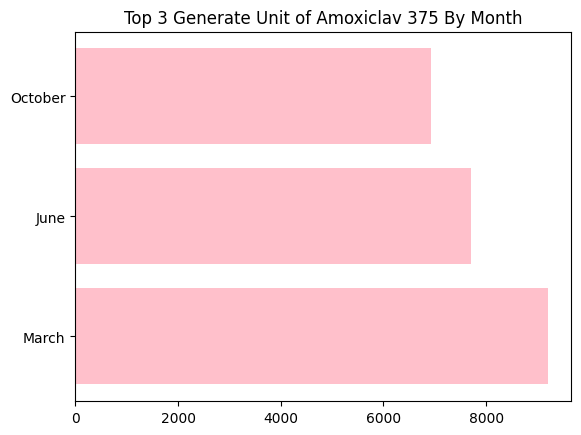

In [138]:
plt.barh(top_375_mon['month'],top_375_mon['total_mon_375'],color='pink')
plt.title('Top 3 Generate Unit of Amoxiclav 375 By Month')
plt.show()

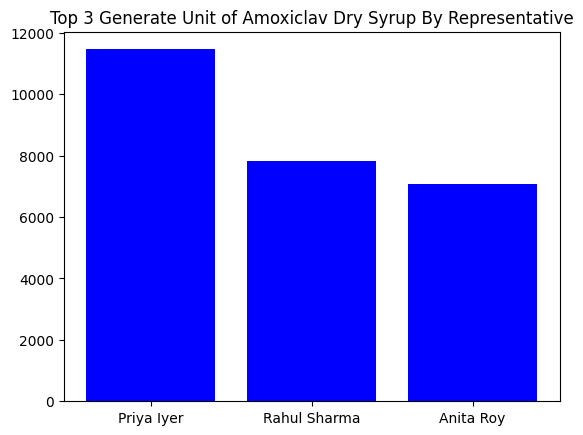

In [140]:

plt.bar(data_top_dry_mr['Sales Representative'],data_top_dry_mr['total_dry'],color='blue')
plt.title('Top 3 Generate Unit of Amoxiclav Dry Syrup By Representative')
plt.show()

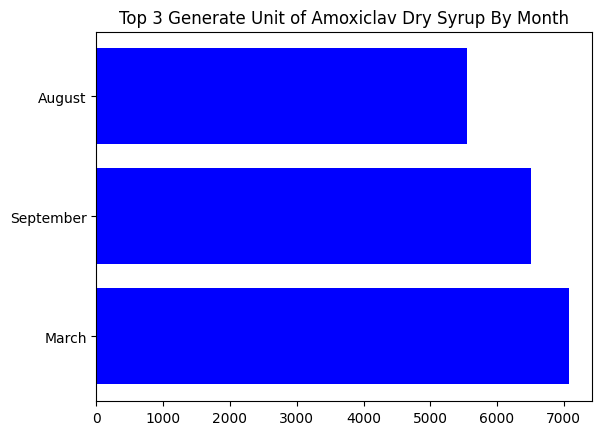

In [143]:

plt.barh(data_top_dry_mon['month'],data_top_dry_mon['total_mon_dry'],color='blue')
plt.title('Top 3 Generate Unit of Amoxiclav Dry Syrup By Month')
plt.show()

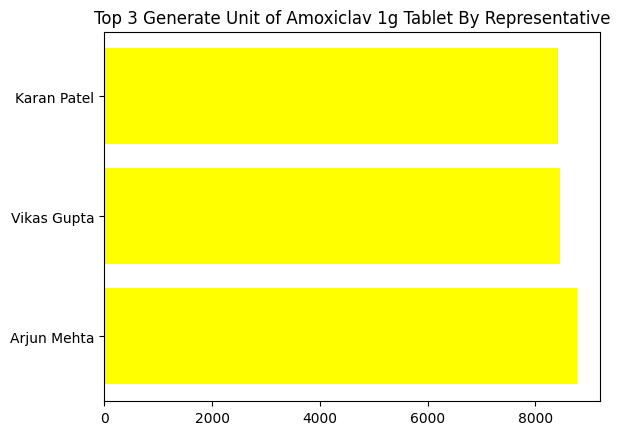

In [145]:

plt.barh(data_top_1g['Sales Representative'],data_top_1g['total_1g'],color='yellow')
plt.title('Top 3 Generate Unit of Amoxiclav 1g Tablet By Representative')
plt.show()

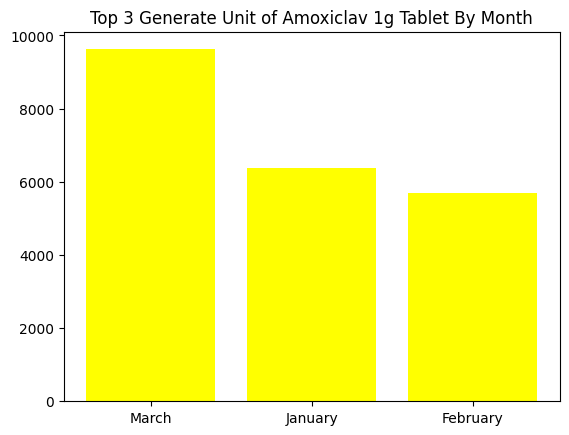

In [149]:

plt.bar(data_top_1g_mon['month'],data_top_1g_mon['total_1g_mon'],color='yellow')
plt.title('Top 3 Generate Unit of Amoxiclav 1g Tablet By Month')
plt.show()
